# Exploratory Training Data Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
from pdpbox import get_dataset, info_plots, pdp

%matplotlib inline
%config InlineBackend.figure_format ='retina'

pio.renderers.default = "notebook"
import plotly.figure_factory as ff
import plotly.offline as py

py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import missingno as msno
import numpy
import plotly.graph_objs as go
import plotly.tools as tls
import scipy.cluster.hierarchy as hcluster
import scipy.cluster.hierarchy as shc
import sys
import sklearn.neighbors._base  
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from plotnine import *
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("ggplot")
import seaborn as sns
from matplotlib import pyplot
from pdpbox import get_dataset, info_plots, pdp
from sklearn.ensemble import (
    BaggingRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    StackingRegressor,
    VotingRegressor,
)
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")
sns.mpl.rcParams["figure.figsize"] = (15.0, 9.0)

import re

from scipy.cluster.hierarchy import dendrogram, linkage

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

import gc
import warnings

warnings.filterwarnings("ignore")

import xgboost
from sklearn.model_selection import train_test_split

seed = 0

In [12]:
dataset =  pd.read_csv("lipids_total_unknown_TPM.txt", sep="\t")
dataset.shape

(8460, 86)

In [13]:
data = dataset.drop(
    ["Gene"], 1
)  # recommended features to be removed by autoimpute package - due to zero values on fitting
print(data.shape)

(8460, 85)


In [14]:
data.describe()

,logpval_gwascatalog,Adipose - Subcutaneous_GTExTPM,Adipose - Visceral (Omentum)_GTExTPM,Adrenal Gland_GTExTPM,Artery - Aorta_GTExTPM,Artery - Coronary_GTExTPM,Artery - Tibial_GTExTPM,Bladder_GTExTPM,Brain - Amygdala_GTExTPM,Brain - Anterior cingulate cortex (BA24)_GTExTPM,...,O_GlcNAc_Score,EMS_Max,ExAc_constraint_obs_exp,SignalValue_H3k27me3_median,SignalValue_H3k36me3_median,SignalValue_H3k79me2_median,SignalValue_H3k9ac_median,SignalValue_H3k9me1_median,H4k20me1_count,SignalValue_H4k20me1_median
count,4370.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,...,713.000000,677.000000,862.000000,3766.000000,4891.000000,4570.000000,5276.000000,4868.000000,4189.000000,4189.000000
mean,39.763959,24.364366,22.246064,18.095042,29.416309,27.016745,29.591579,23.970142,11.176775,12.831992,...,6.834675,3.739678,0.642894,4.795275,4.374490,6.846092,17.689060,1.954984,110.988064,2.810028
std,122.240516,111.202862,102.029577,72.639190,159.532869,141.462107,171.719591,112.986316,46.117572,46.700106,...,7.485905,3.332966,0.380223,3.468967,2.764598,3.772109,11.107247,1.677256,193.594137,2.399615
min,5.045757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000123,0.000000,1.191280,1.126010,1.133260,1.448140,1.080050,1.000000,1.073390
25%,9.096910,0.021683,0.025589,0.015125,0.005953,0.013925,0.000000,0.032959,0.000282,0.014932,...,2.758373,0.014191,0.362290,2.469640,2.525012,4.377840,10.429375,1.283760,13.000000,1.638660
50%,14.522879,1.920610,1.839550,1.448290,1.918655,2.071480,1.604365,2.178280,1.138320,1.254255,...,5.095755,3.842600,0.612251,3.624090,3.515880,5.995230,14.503000,1.644605,43.000000,2.005740
75%,29.154902,18.398425,16.062950,13.650900,19.203800,18.650950,18.582825,18.710300,7.789293,9.102075,...,7.758076,5.556800,0.925579,5.936913,5.174895,8.333647,22.275800,2.007300,123.000000,2.840640
max,3494.397940,3394.240000,3173.820000,2260.860000,6099.430000,5769.820000,7796.270000,3207.780000,1374.120000,1233.320000,...,100.000000,9.928800,3.694822,70.326300,46.451300,33.622000,87.772500,31.180100,3707.000000,46.970800


### Plotting Data Missingness:

<AxesSubplot:>

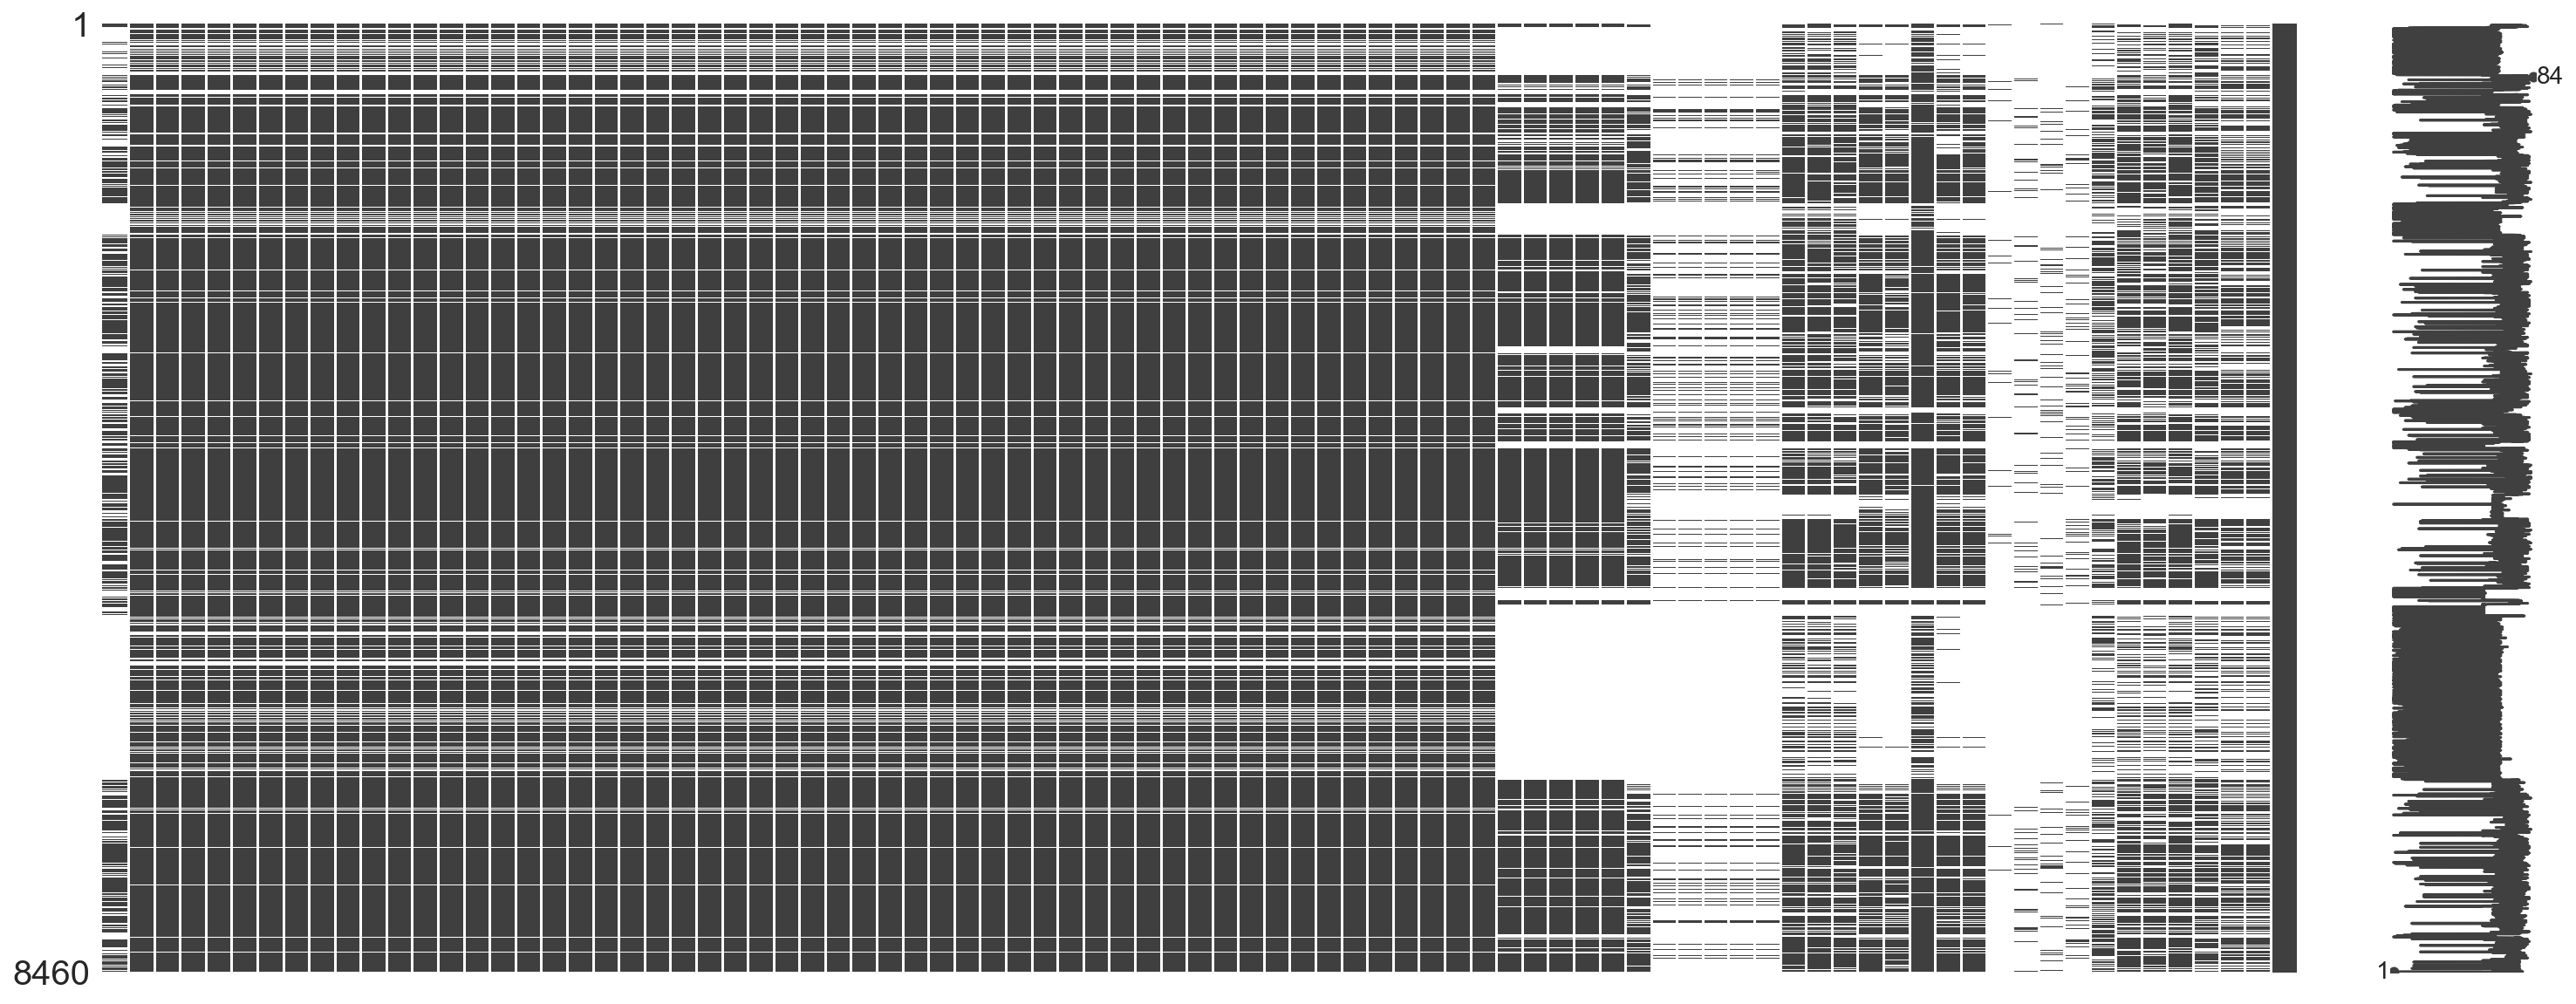

In [15]:
msno.matrix(data)
# msno.heatmap(data)

In [16]:
data.isnull().sum()

logpval_gwascatalog                     4090
Adipose - Subcutaneous_GTExTPM           982
Adipose - Visceral (Omentum)_GTExTPM     982
Adrenal Gland_GTExTPM                    982
Artery - Aorta_GTExTPM                   982
                                        ... 
SignalValue_H3k9ac_median               3184
SignalValue_H3k9me1_median              3592
H4k20me1_count                          4271
SignalValue_H4k20me1_median             4271
label                                      0
Length: 85, dtype: int64

In [17]:
natest = data.isnull().sum()
natest.sort_values(inplace=True)
# natest.to_csv('traininggenes_features_with_NA.csv')

In [18]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame(
    {"column_name": data.columns, "percent_missing": percent_missing}
)
missing_value_df.sort_values("percent_missing", inplace=True)

In [19]:
natest = natest.to_frame()
missingdata = natest.join(missing_value_df)

In [20]:
missingdata.to_csv("unknownggenes_features_with_NA.csv")

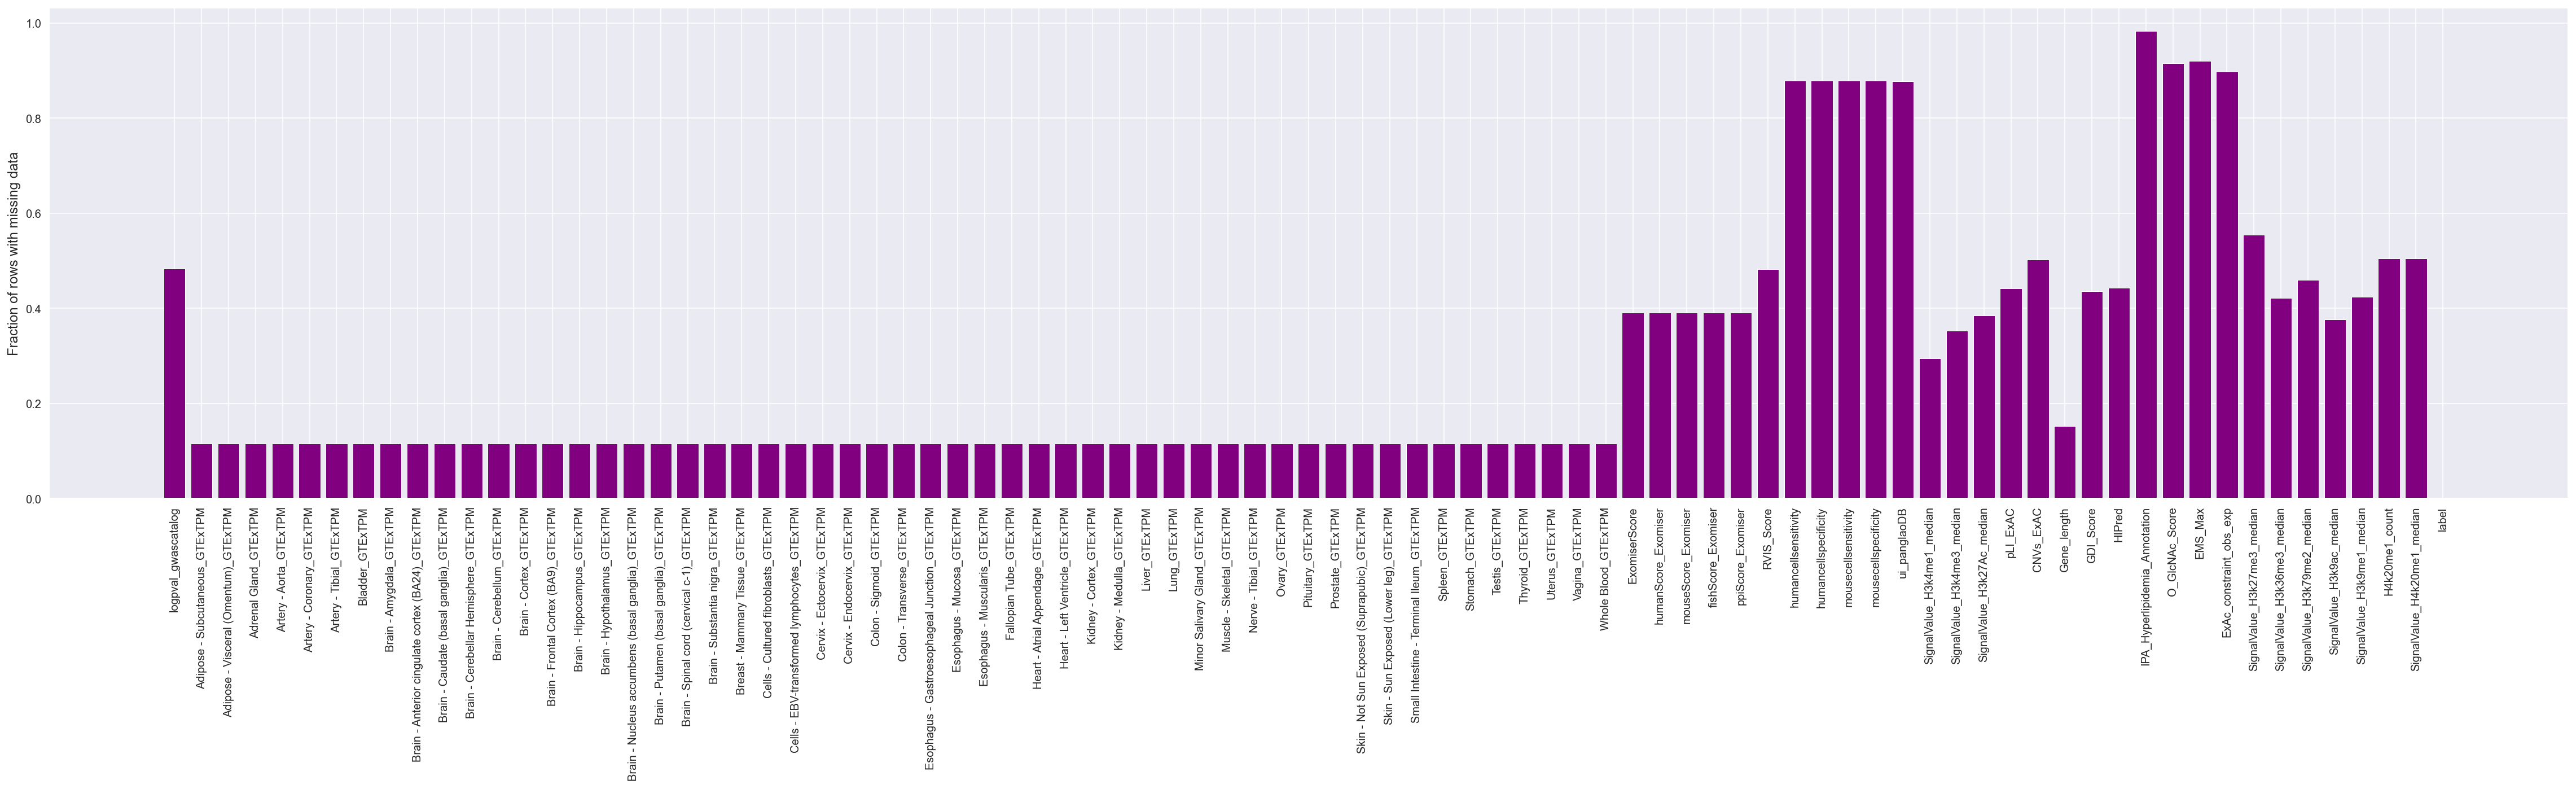

In [21]:
null_counts = data.isnull().sum() / len(data)
plt.figure(figsize=(40, 8))
plt.xticks(np.arange(len(null_counts)) + 0.0, null_counts.index, rotation="vertical")
plt.ylabel("Fraction of rows with missing data")
plt.bar(np.arange(len(null_counts)), null_counts, color="purple")
plt.savefig("unknown_missingness.png", format="png", dpi=300, bbox_inches="tight")

<BarContainer object of 11 artists>

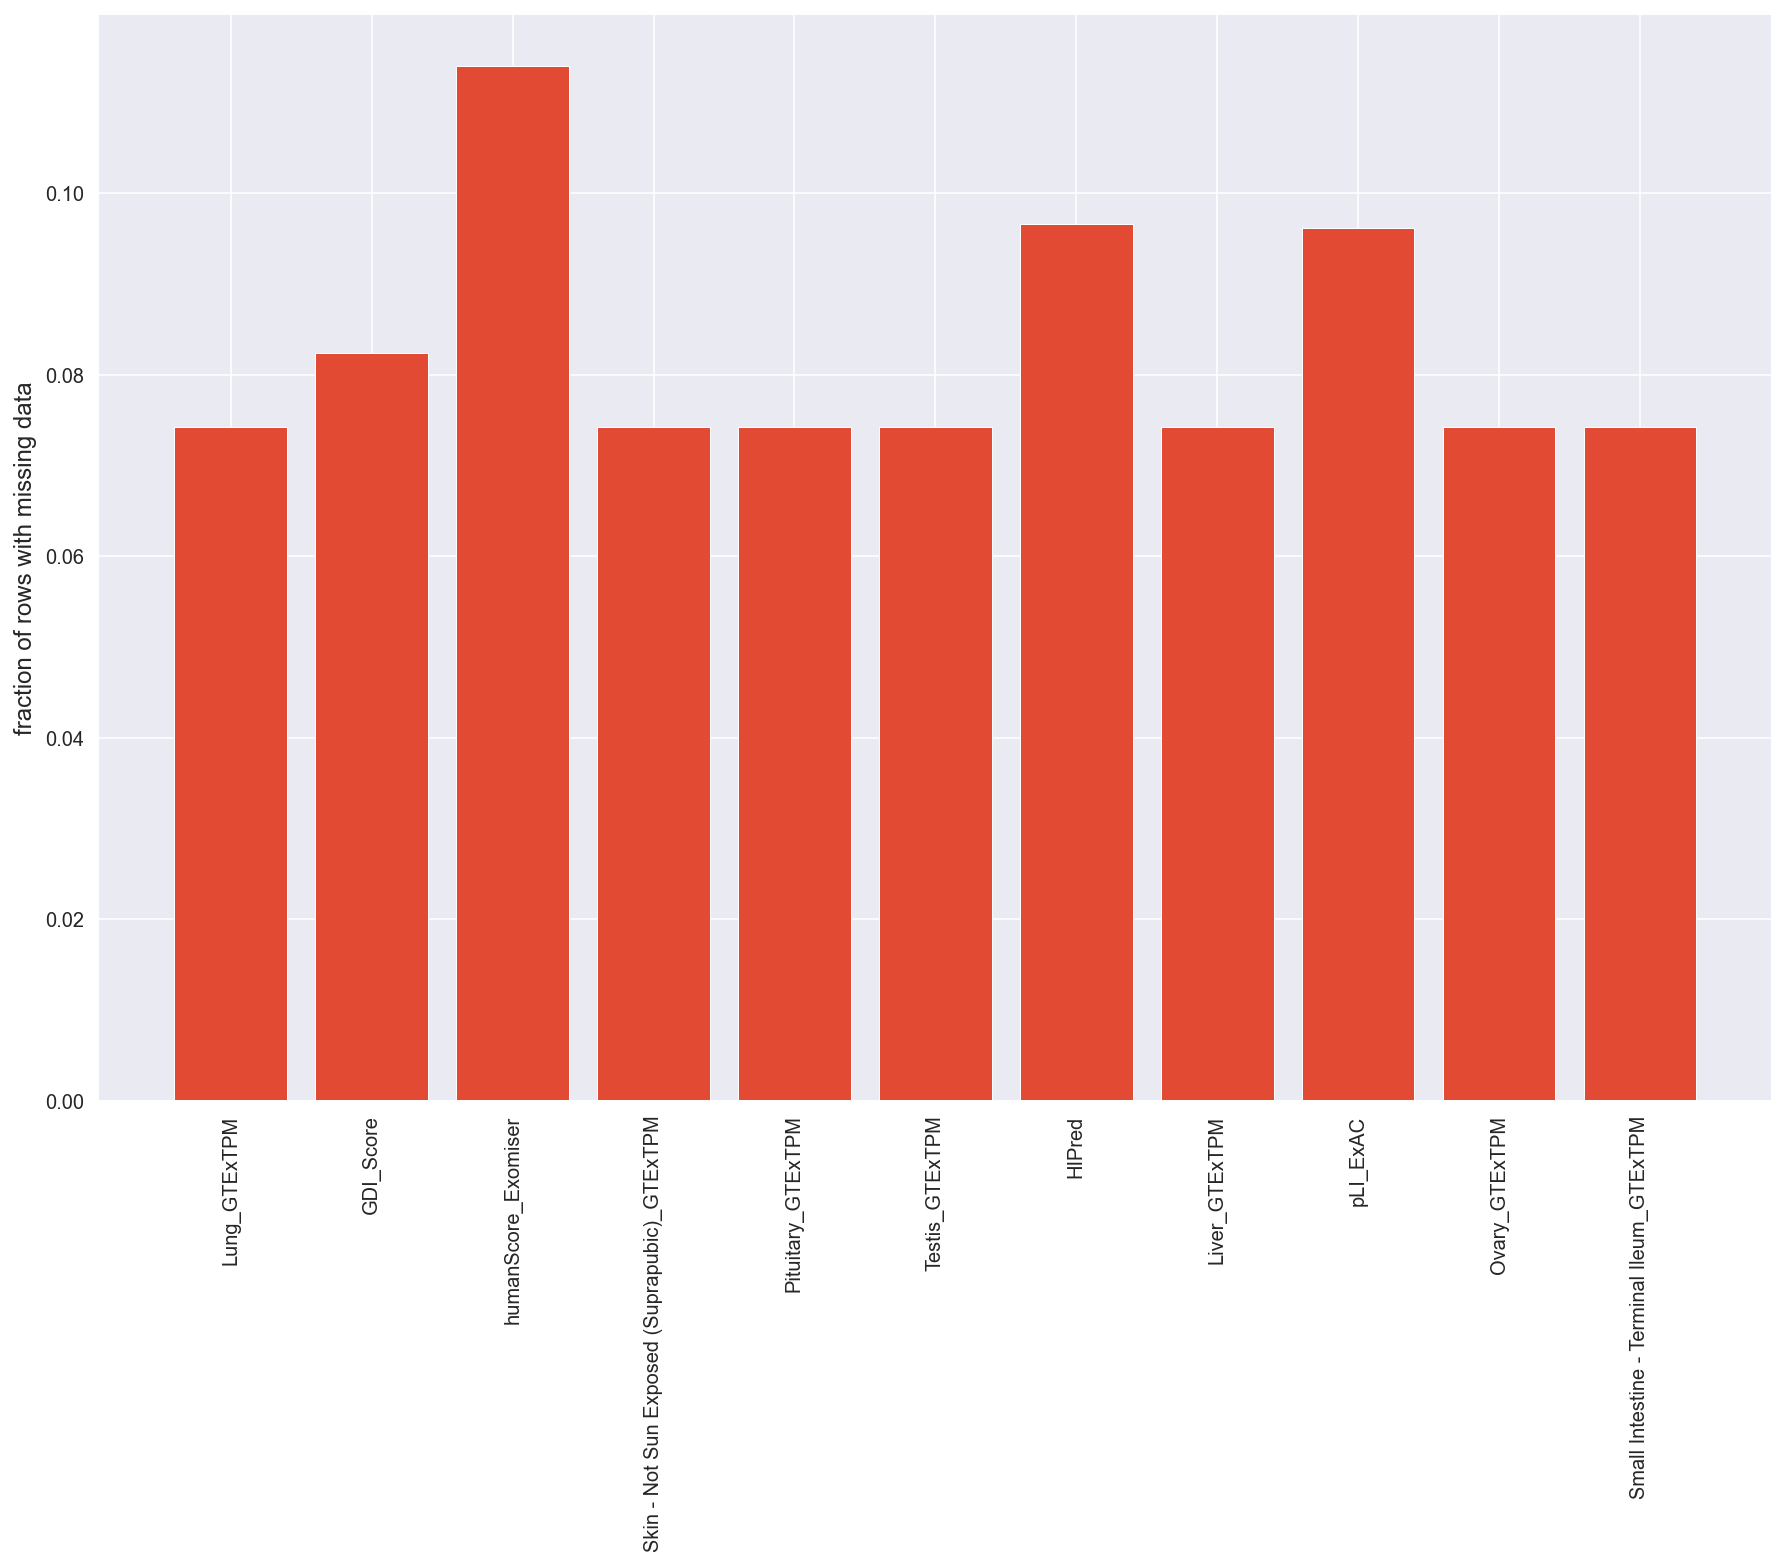

In [16]:
data_selected = data[
    [
       'Lung_GTExTPM', 'GDI_Score', 'humanScore_Exomiser',
                 'Skin - Not Sun Exposed (Suprapubic)_GTExTPM', 'Pituitary_GTExTPM',
                 'Testis_GTExTPM', 'HIPred', 'Liver_GTExTPM', 'pLI_ExAC', 
                 'Ovary_GTExTPM', 'Small Intestine - Terminal Ileum_GTExTPM'
    ]
]
null_counts = data_selected.isnull().sum() / len(data_selected)
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(len(null_counts)) + 0.0, null_counts.index, rotation="vertical")
plt.ylabel("fraction of rows with missing data")
plt.bar(np.arange(len(null_counts)), null_counts)

In [18]:
selection = dataset[
    [
        "Gene",
      'Lung_GTExTPM', 'GDI_Score', 'humanScore_Exomiser',
                 'Skin - Not Sun Exposed (Suprapubic)_GTExTPM', 'Pituitary_GTExTPM',
                 'Testis_GTExTPM', 'HIPred', 'Liver_GTExTPM', 'pLI_ExAC', 
                 'Ovary_GTExTPM', 'Small Intestine - Terminal Ileum_GTExTPM'
    ]
]

In [19]:
dt2 = selection
dat = dt2.set_index("Gene")

## Feature Correlation:

In [20]:
df = dt2
df = df.set_index("Gene")
df.shape

(19382, 11)

In [21]:
X = MinMaxScaler().fit_transform(df)
imputer = MissForest(random_state=seed)
X = pd.DataFrame(imputer.fit_transform(X), index=df.index, columns=df.columns)

Iteration: 0
Iteration: 1
Iteration: 2


In [23]:
Xcor = X

Xcor = pd.DataFrame(data=Xcor, columns=X.columns)

corr = Xcor.corr(method="spearman")

f, ax = plt.subplots(figsize=(60, 50))

cmap = sns.diverging_palette(10, 275, as_cmap=True)
sns.set(font_scale=3)

sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    annot=True,
    ax=ax,
)

corr_matrix = data.corr()
# print(corr_matrix["BPlabel_encoded"].sort_values(ascending=False))
# corr = corr_matrix["BPlabel_encoded"].sort_values(ascending=False)

In [24]:
corr.to_csv("unknown_correlation.csv", header=True)

In [25]:
corr = X.corr()
corr.head()

,Lung_GTExTPM,GDI_Score,humanScore_Exomiser,Skin - Not Sun Exposed (Suprapubic)_GTExTPM,Pituitary_GTExTPM,Testis_GTExTPM,HIPred,Liver_GTExTPM,pLI_ExAC,Ovary_GTExTPM,Small Intestine - Terminal Ileum_GTExTPM
Lung_GTExTPM,1.000000,0.001308,0.033406,0.322071,0.084079,0.114618,0.097801,0.187299,0.073127,0.636388,0.695865
GDI_Score,0.001308,1.000000,0.031607,-0.004521,-0.011193,-0.020429,-0.140430,-0.017552,-0.127167,-0.032991,-0.007428
humanScore_Exomiser,0.033406,0.031607,1.000000,0.012320,0.009964,-0.003229,0.070931,0.069130,-0.013800,0.009786,0.025058
Skin - Not Sun Exposed (Suprapubic)_GTExTPM,0.322071,-0.004521,0.012320,1.000000,0.049823,0.071582,0.070300,0.054176,0.056443,0.464496,0.354688
Pituitary_GTExTPM,0.084079,-0.011193,0.009964,0.049823,1.000000,0.018939,0.014383,0.016202,0.008192,0.102985,0.083021


In [26]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

[]

### Viewing genes >25% missing rowwise for selected features (after running BorutaShap)

In [27]:
dt = dt2[
    [
       'Lung_GTExTPM', 'GDI_Score', 'humanScore_Exomiser',
                 'Skin - Not Sun Exposed (Suprapubic)_GTExTPM', 'Pituitary_GTExTPM',
                 'Testis_GTExTPM', 'HIPred', 'Liver_GTExTPM', 'pLI_ExAC', 
                 'Ovary_GTExTPM', 'Small Intestine - Terminal Ileum_GTExTPM',
    ]
]

In [28]:
dt["missing_count"] = dt.isnull().sum(axis=1)  # dt.apply(lambda x: x.count(), axis=1)

dt["missing_percentage"] = (dt["missing_count"] / 19) * 100

dt.sort_values("missing_percentage", inplace=True)
print(dt[["missing_count", "missing_percentage"]])
# dt.shape

       missing_count  missing_percentage
0                  0            0.000000
12369              0            0.000000
12370              0            0.000000
12372              0            0.000000
12373              0            0.000000
...              ...                 ...
2232              11           57.894737
2228              11           57.894737
2224              11           57.894737
2213              11           57.894737
19381             11           57.894737

[19382 rows x 2 columns]


In [29]:
dtmissing = dt.loc[dt["missing_percentage"] > 25]
dtmissing

,Lung_GTExTPM,GDI_Score,humanScore_Exomiser,Skin - Not Sun Exposed (Suprapubic)_GTExTPM,Pituitary_GTExTPM,Testis_GTExTPM,HIPred,Liver_GTExTPM,pLI_ExAC,Ovary_GTExTPM,Small Intestine - Terminal Ileum_GTExTPM,missing_count,missing_percentage
8480,NaN,14.73713,0.000000,NaN,NaN,NaN,0.764746,NaN,9.611326e-01,NaN,NaN,7,36.842105
13380,NaN,3016.49921,0.000000,NaN,NaN,NaN,0.111908,NaN,2.568652e-08,NaN,NaN,7,36.842105
10841,NaN,249.31930,0.000000,NaN,NaN,NaN,0.163882,NaN,6.265079e-01,NaN,NaN,7,36.842105
9257,NaN,1102.81114,0.000000,NaN,NaN,NaN,0.132359,NaN,2.925351e-03,NaN,NaN,7,36.842105
9560,NaN,37.01667,0.745356,NaN,NaN,NaN,0.397666,NaN,2.169106e-03,NaN,NaN,7,36.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,57.894737
2228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,57.894737
2224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,57.894737
2213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,57.894737


### Feature distribution:

In [31]:
def draw_histograms(dataf, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(
            bins=40,
            linewidth=1.0,
            xlabelsize=18,
            ylabelsize=18,
            figsize=(30, 30),
            ax=ax,
        )
        ax.set_title(var_name + " Distribution")
    fig.tight_layout()
    plt.suptitle("Predicted Data Univariate Plots", y=1.02, fontsize=35)
    plt.savefig(
        "predicted_gene_feature_distribution.png", format="png", dpi=300, bbox_inches="tight"
    )
    plt.show()


#test = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))
#draw_histograms(dt, dt.columns, 4, 2)

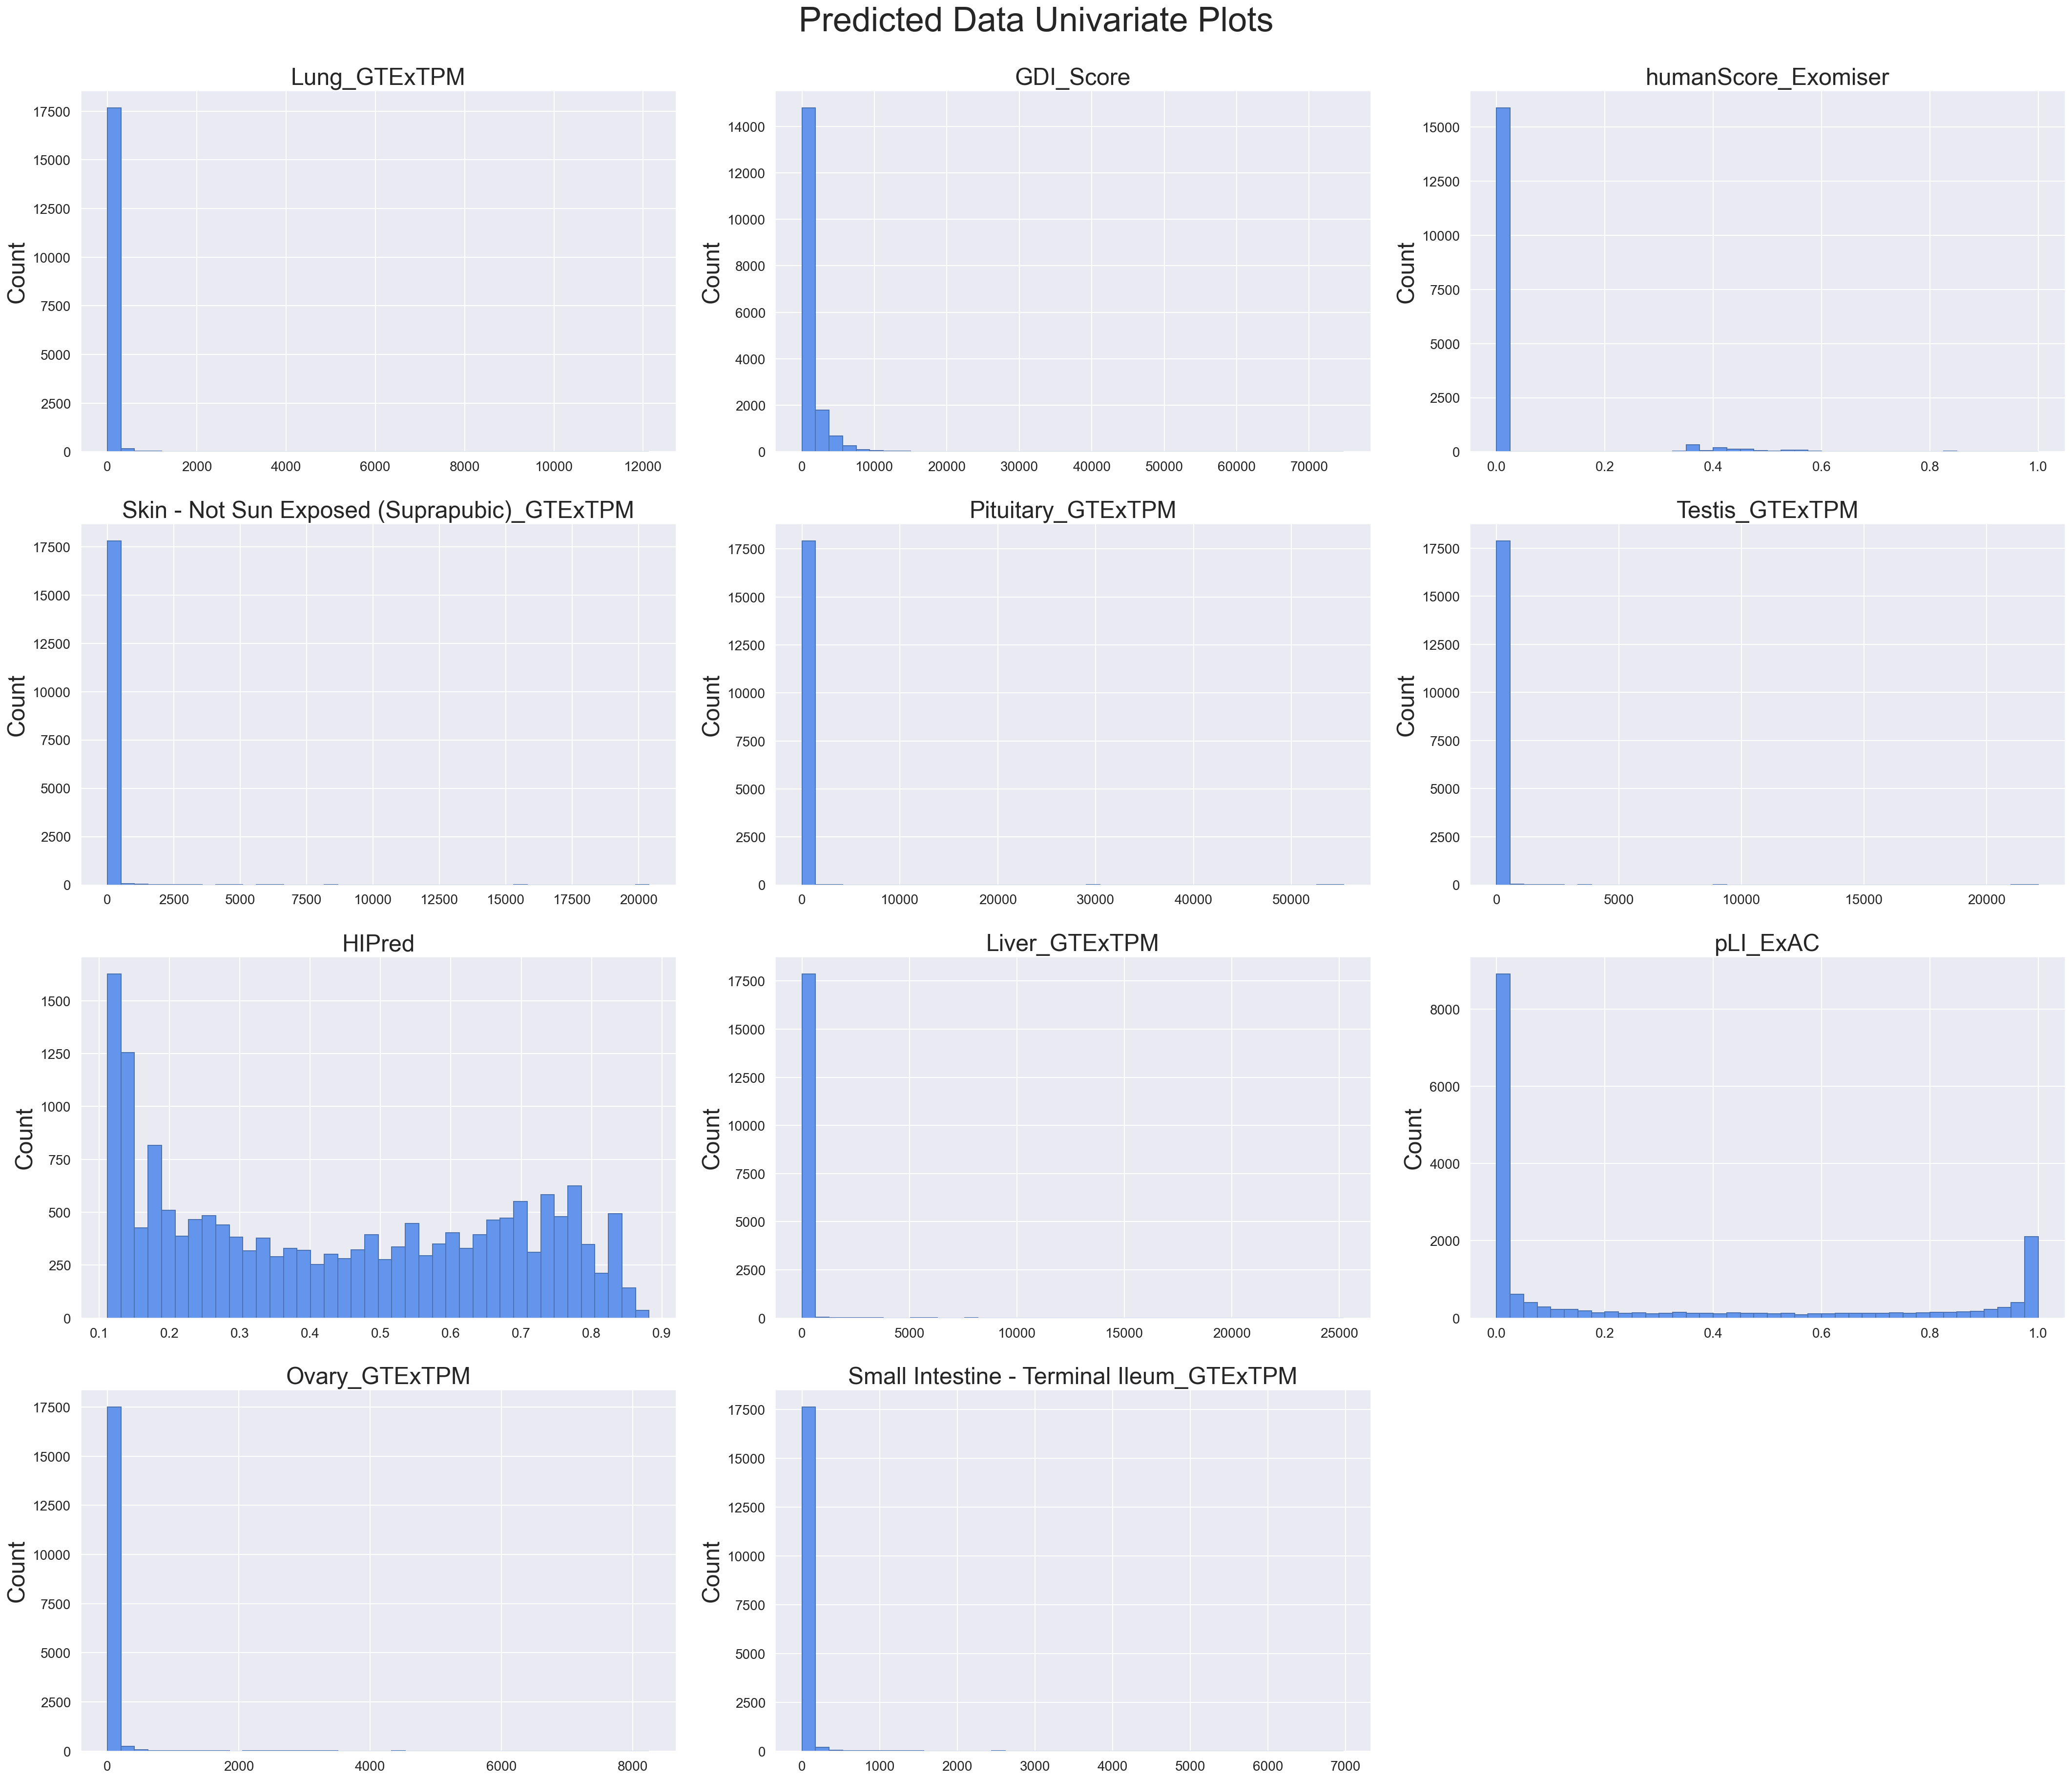

In [32]:
# features only selected by BorutaShap:
sns.set(font_scale=2)
features_list = [
       'Lung_GTExTPM', 'GDI_Score', 'humanScore_Exomiser',
                 'Skin - Not Sun Exposed (Suprapubic)_GTExTPM', 'Pituitary_GTExTPM',
                 'Testis_GTExTPM', 'HIPred', 'Liver_GTExTPM', 'pLI_ExAC', 
                 'Ovary_GTExTPM', 'Small Intestine - Terminal Ileum_GTExTPM',
]


axarr = dt[features_list].hist(
    bins=40,
    edgecolor="b",
    linewidth=1.0,
    xlabelsize=14,
    ylabelsize=14,
    # grid=False,
    figsize=(30, 25),
    color="cornflowerblue",
)

for ax in axarr.flatten():
    ax.set_ylabel("Count")

plt.tight_layout()
plt.grid(axis="x", color="0.95")
plt.suptitle("Predicted Data Univariate Plots", y=1.02, fontsize=35)

plt.savefig(
    "predicted_gene_feature_distribution.png", format="png", dpi=300, bbox_inches="tight"
)

### Covariation Heatmaps:

Text(0.5, 1.0, 'Covariance between different features')

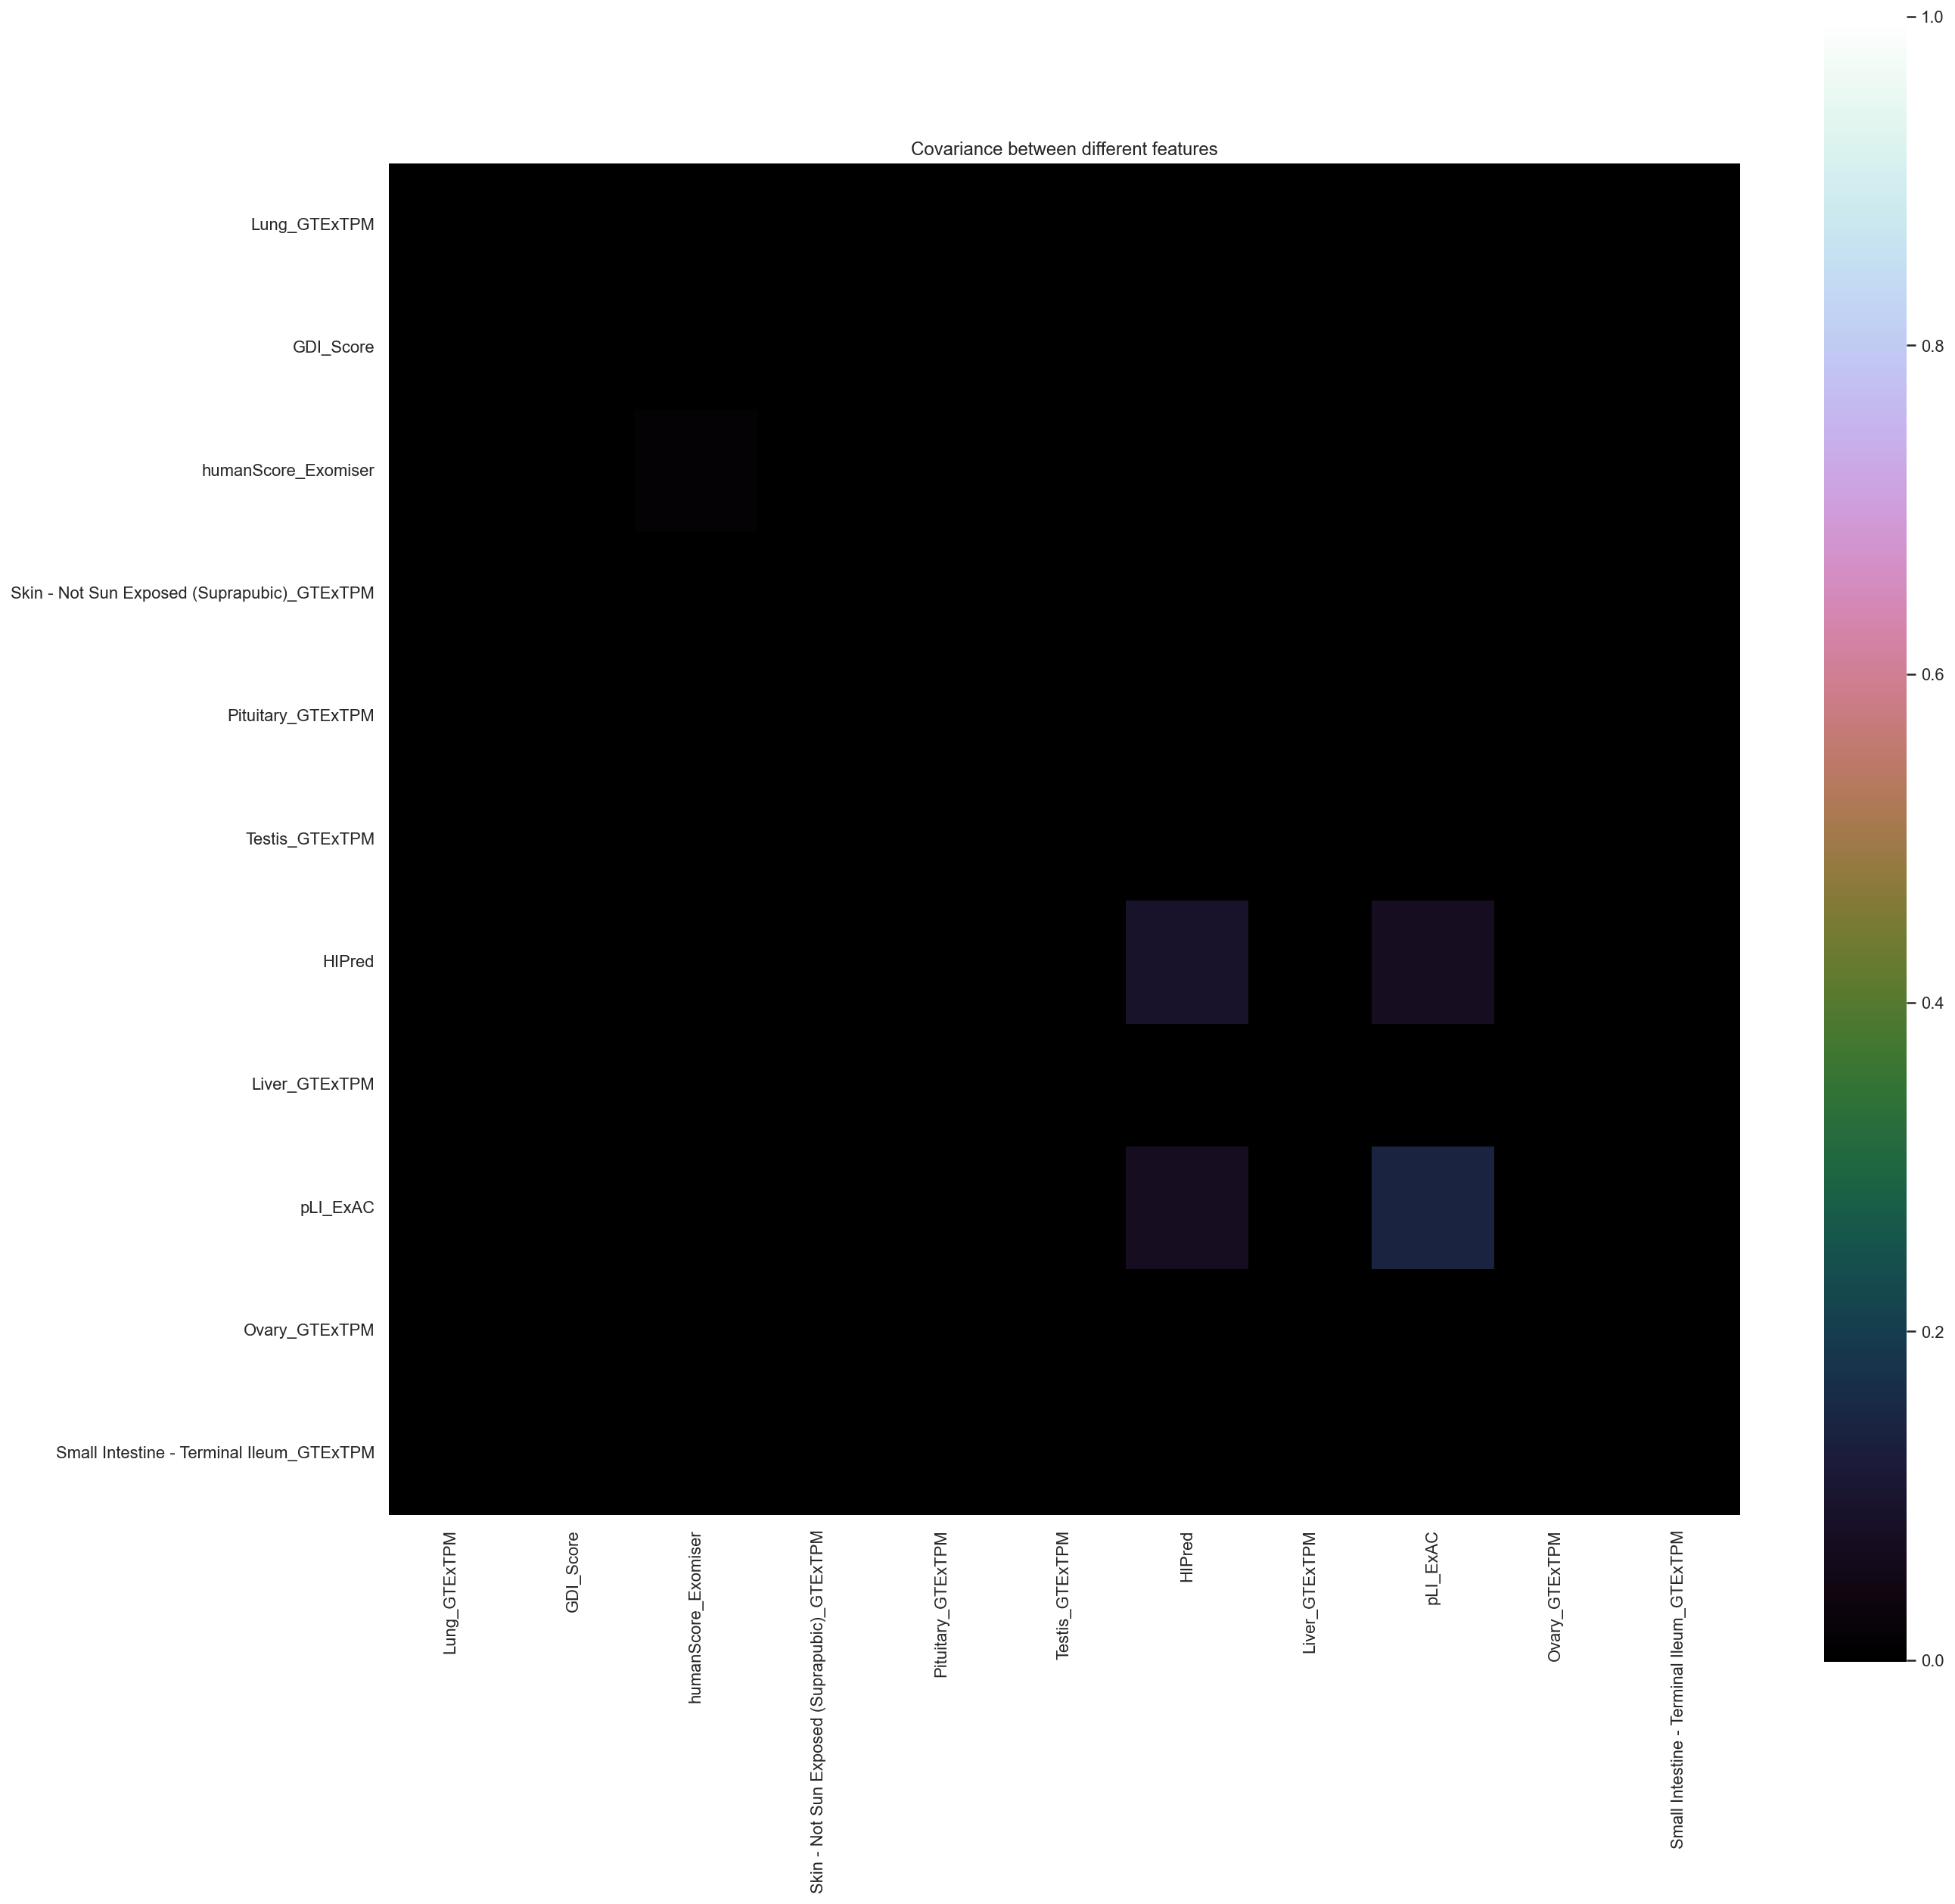

In [34]:
mean_vec = np.mean(Xcor, axis=0)
cov_mat = (Xcor - mean_vec).T.dot((Xcor - mean_vec)) / (Xcor.shape[0] - 1)
# print('Covariance matrix \n%s' %cov_mat)
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.heatmap(cov_mat, vmax=1, square=True, cmap="cubehelix")

plt.title("Covariance between different features")

### Clustering to view training data grouping:

#### PCA Explained Variance 
- for deciding n components in hierarchal clustering

In [35]:
X2 = X[['Lung_GTExTPM', 'GDI_Score', 'humanScore_Exomiser',
                 'Skin - Not Sun Exposed (Suprapubic)_GTExTPM', 'Pituitary_GTExTPM',
                 'Testis_GTExTPM', 'HIPred', 'Liver_GTExTPM', 'pLI_ExAC', 
                 'Ovary_GTExTPM', 'Small Intestine - Terminal Ileum_GTExTPM',]]
mean_vec = np.mean(X2, axis=0)
cov_mat = (X2 - mean_vec).T.dot((X2 - mean_vec)) / (X2.shape[0] - 1)

In [36]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" % eig_vecs)
print("\nEigenvalues \n%s" % eig_vals)


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

Eigenvectors 
[[-2.60832585e-03  2.79833858e-03  2.76014853e-03  3.29002331e-01
  -1.93916378e-02  8.05018977e-01 -4.13164163e-01 -1.68554367e-01
   2.10129409e-01 -5.18073214e-03 -2.68638666e-03]
 [ 8.62837248e-03 -4.31667844e-03  9.35165597e-03 -2.52824332e-02
  -9.99351203e-01 -5.36206959e-03  4.06440036e-03  1.26612233e-02
  -1.41427633e-02 -7.63172673e-03 -3.68728864e-03]
 [-5.43961363e-03  9.95218673e-02  9.94950463e-01 -3.27657279e-03
   8.90082051e-03 -2.67050645e-05  5.88335954e-03  6.68304671e-04
   3.68387026e-03 -7.45020312e-04  4.86085794e-04]
 [-1.83246652e-03  1.58354669e-03  7.29171897e-04  2.13667563e-01
  -1.01910880e-02  1.21020270e-02  3.28071634e-01 -8.20579548e-01
  -3.91177328e-01  1.13031222e-01  8.55096947e-02]
 [-2.82177024e-04  5.22767473e-04  7.68104069e-04  4.45804845e-02
   3.38453258e-03 -1.37153485e-02  5.90013222e-03 -6.52627307e-02
  -7.21940826e-02 -7.32474874e-02 -9.91433738e-01]
 [-6.59467294e-04 -5.16051959e-04 -2.04453650e-04  6.39403546e-02
   6.

In [37]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
len(var_exp)

11

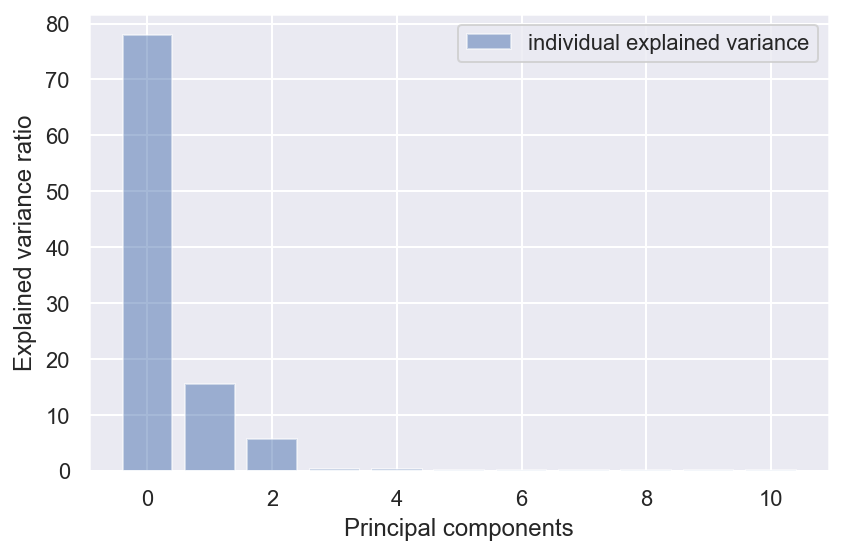

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(6, 4))

plt.bar(
    range(11), var_exp, alpha=0.5, align="center", label="individual explained variance"
)
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.tight_layout()

Text(0, 0.5, 'Cumulative explained variance')

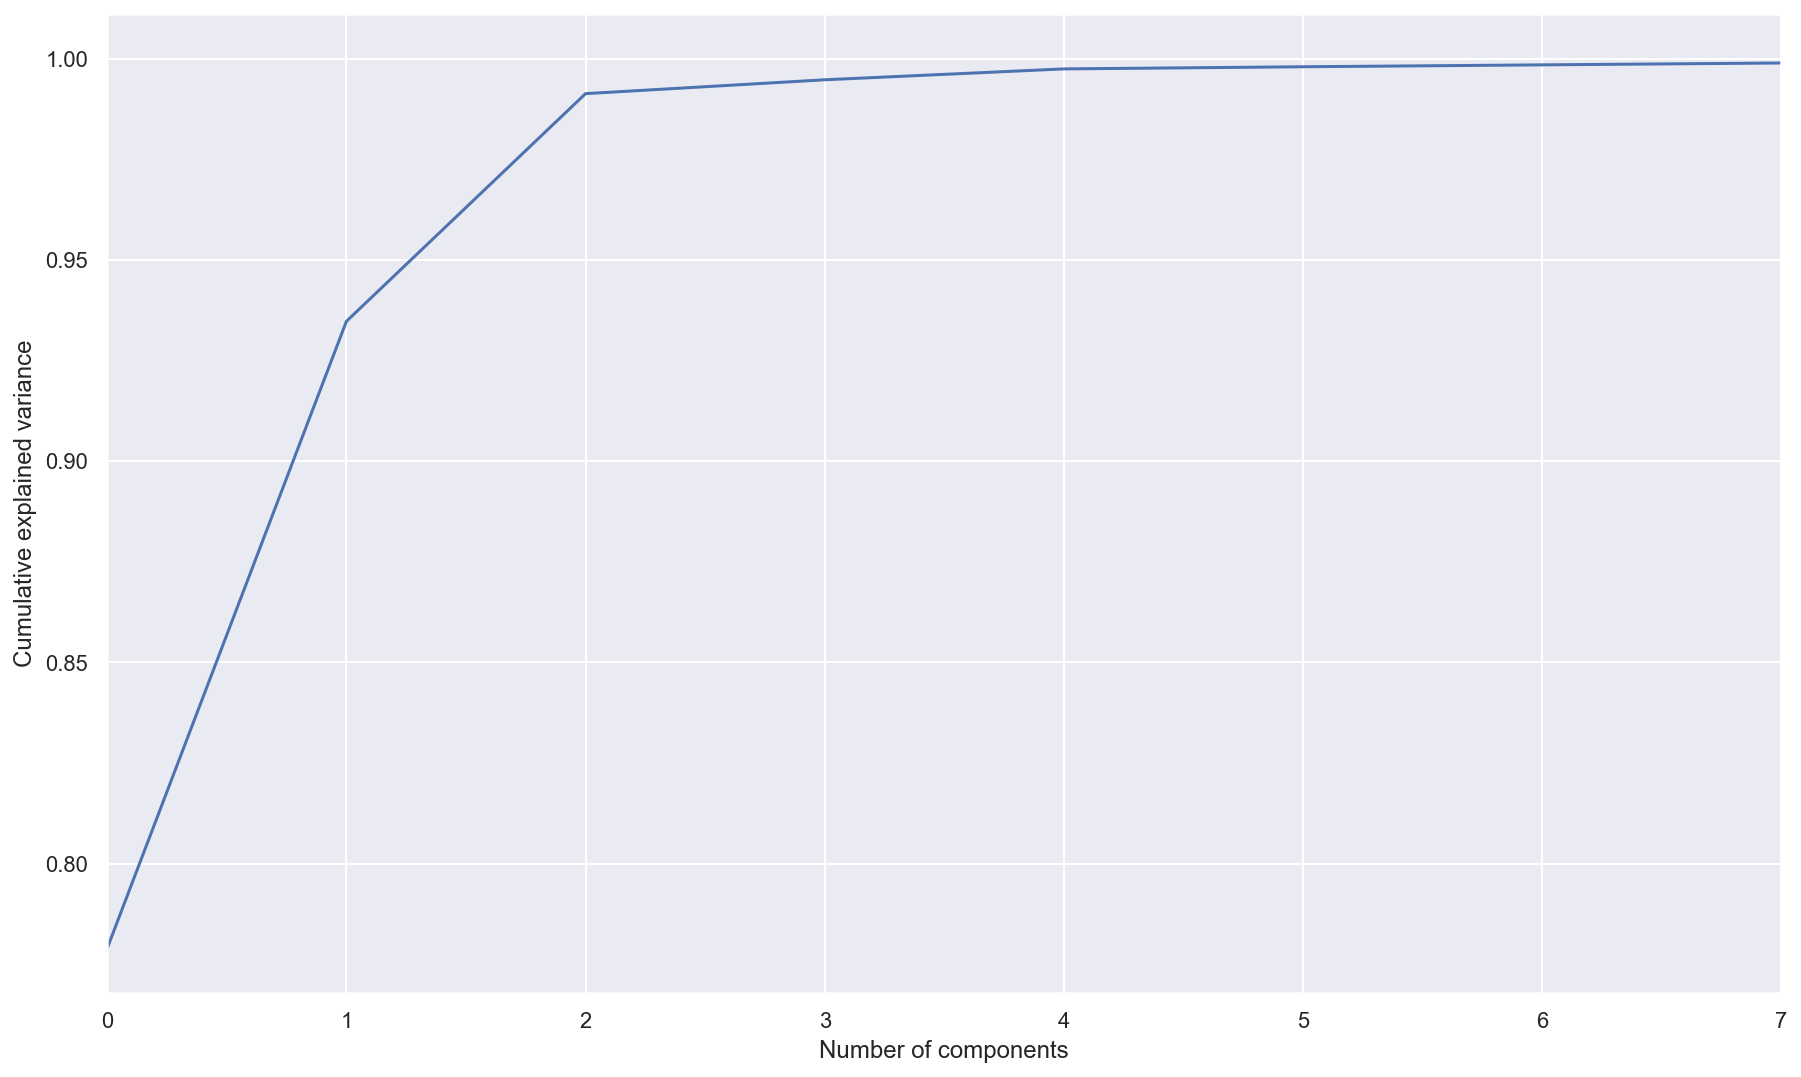

In [39]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 7, 1)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

## Hierarchal Clustering

### All training data:

In [40]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    plt.figure(figsize=(15, 10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get("no_plot", False):
        plt.title("Hierarchical Clustering Dendrogram (truncated)")
        plt.xlabel("sample index or (cluster size)")
        plt.ylabel("distance")
        for i, d, c in zip(ddata["icoord"], ddata["dcoord"], ddata["color_list"]):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, "o", c=c)
                plt.annotate(
                    "%.3g" % y,
                    (x, y),
                    xytext=(0, -5),
                    textcoords="offset points",
                    va="top",
                    ha="center",
                )
        if max_d:
            plt.axhline(y=max_d, c="k")
    return ddata

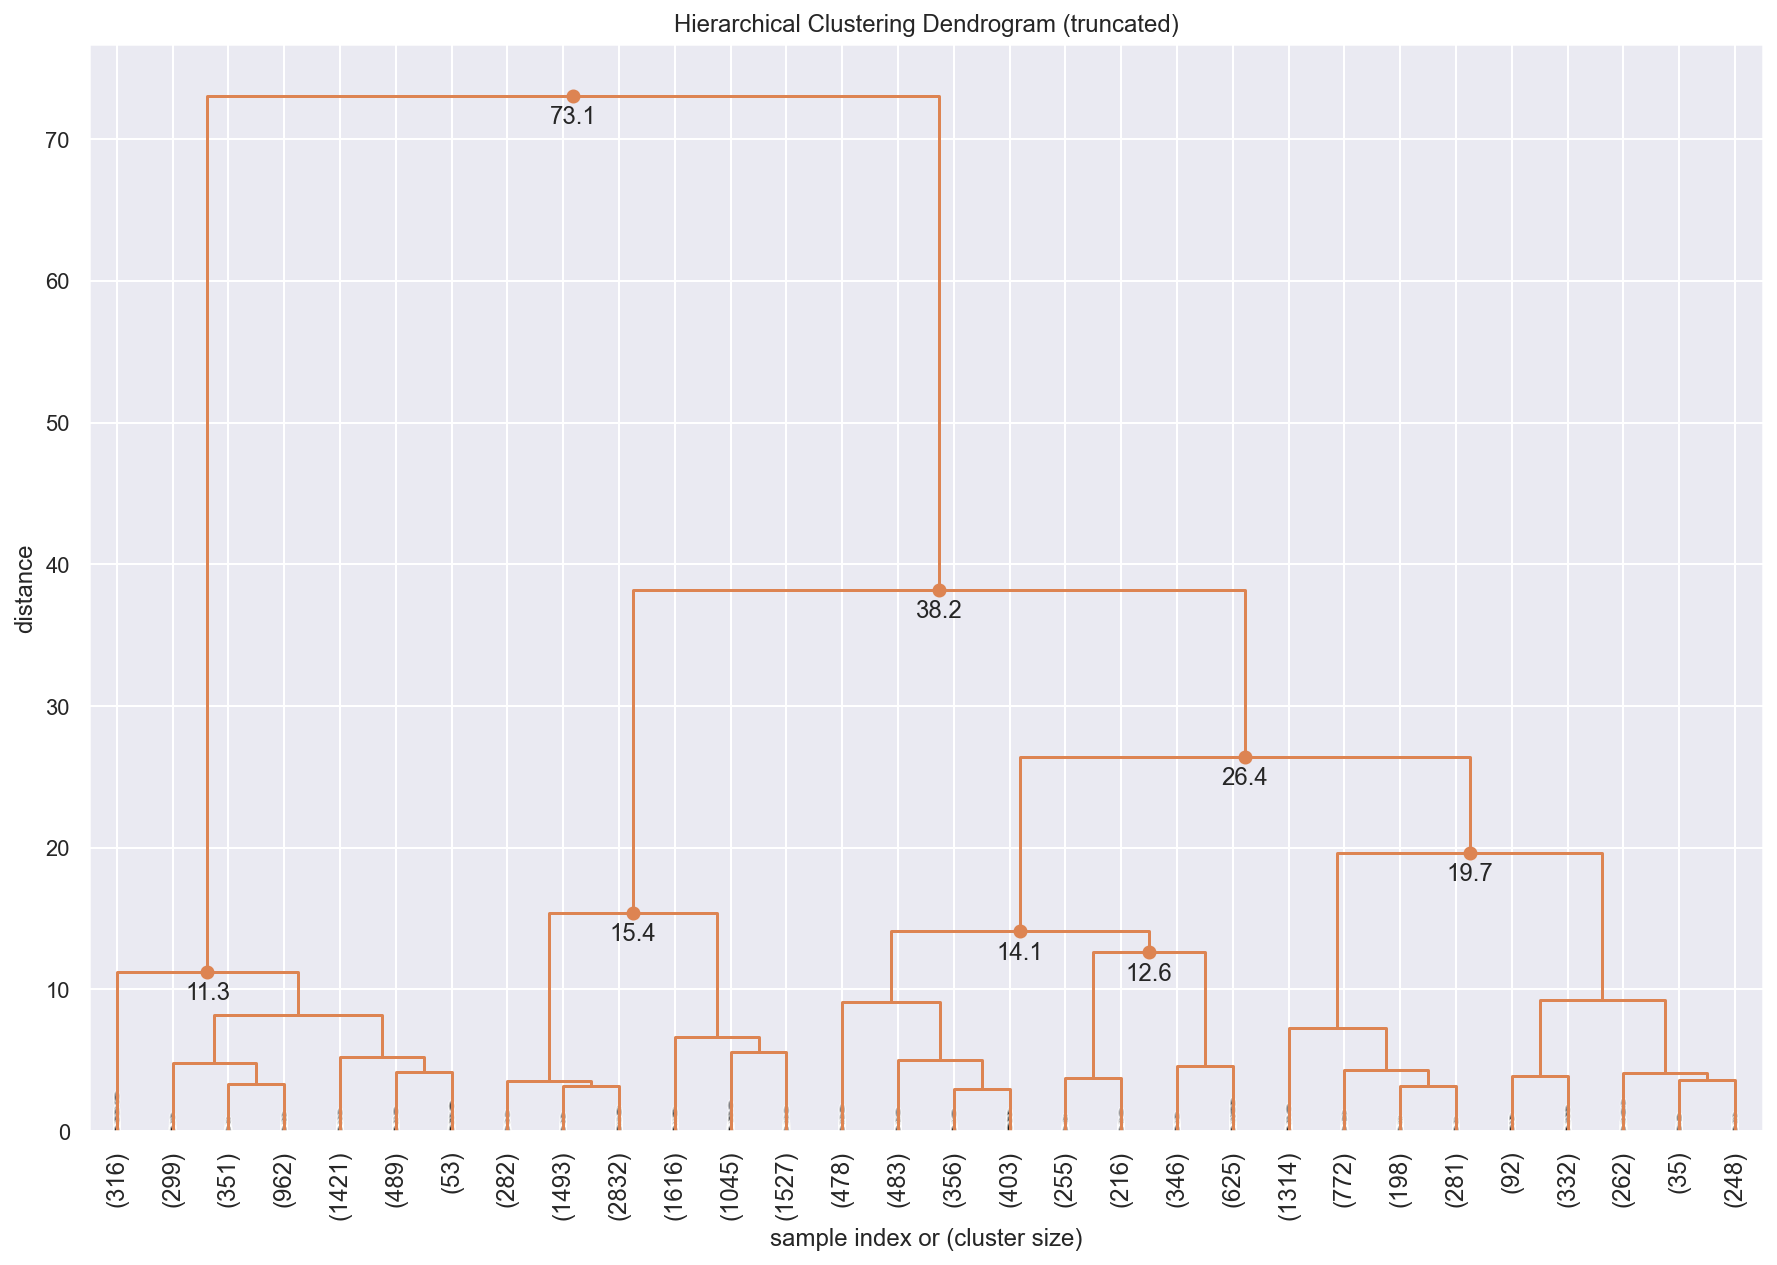

In [41]:
linked_array = ward(X2)

fancy_dendrogram(
    linked_array,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.0,
    leaf_font_size=12.0,
    show_contracted=True,
    annotate_above=10,
    max_d=80,
)

plt.show()

In [42]:
X2.shape

(19382, 11)

In [43]:
# Reducing the dimensions of the data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]

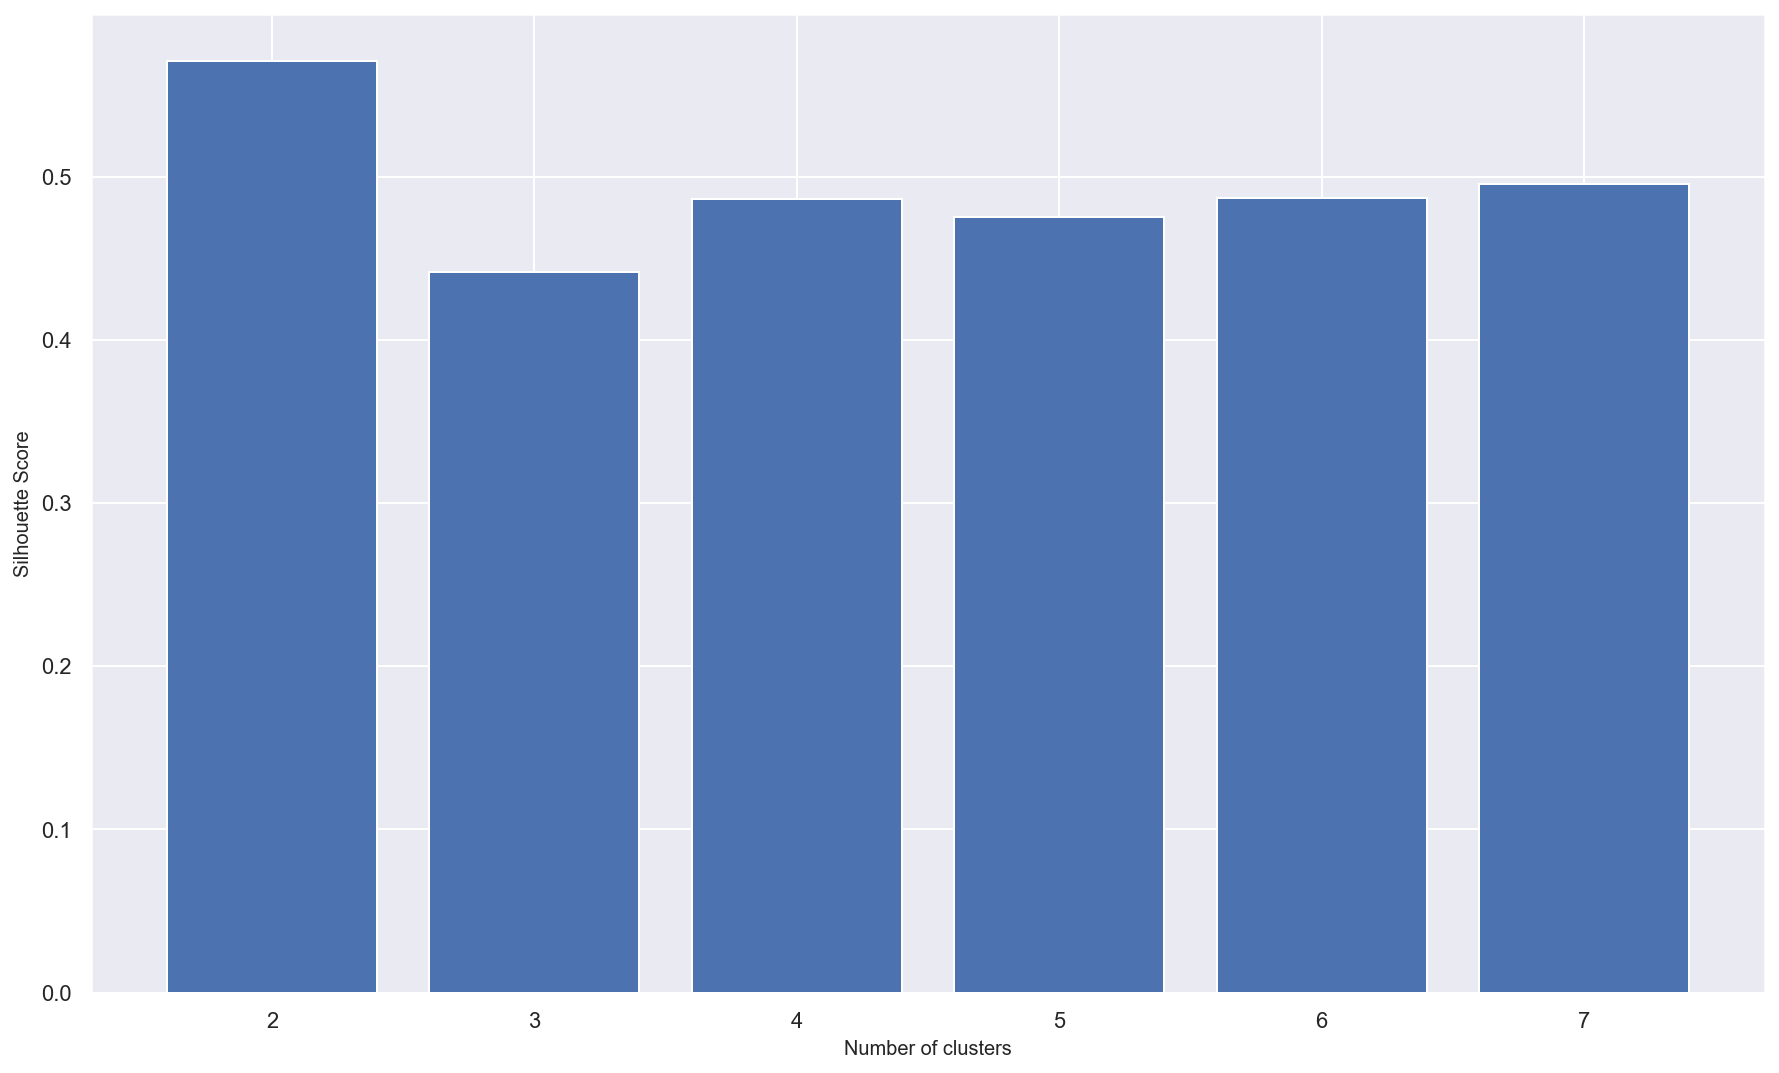

In [44]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(
            X_principal,
            AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_principal),
        )
    )

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6, 7]
plt.bar(k, silhouette_scores)
plt.xlabel("Number of clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.show()

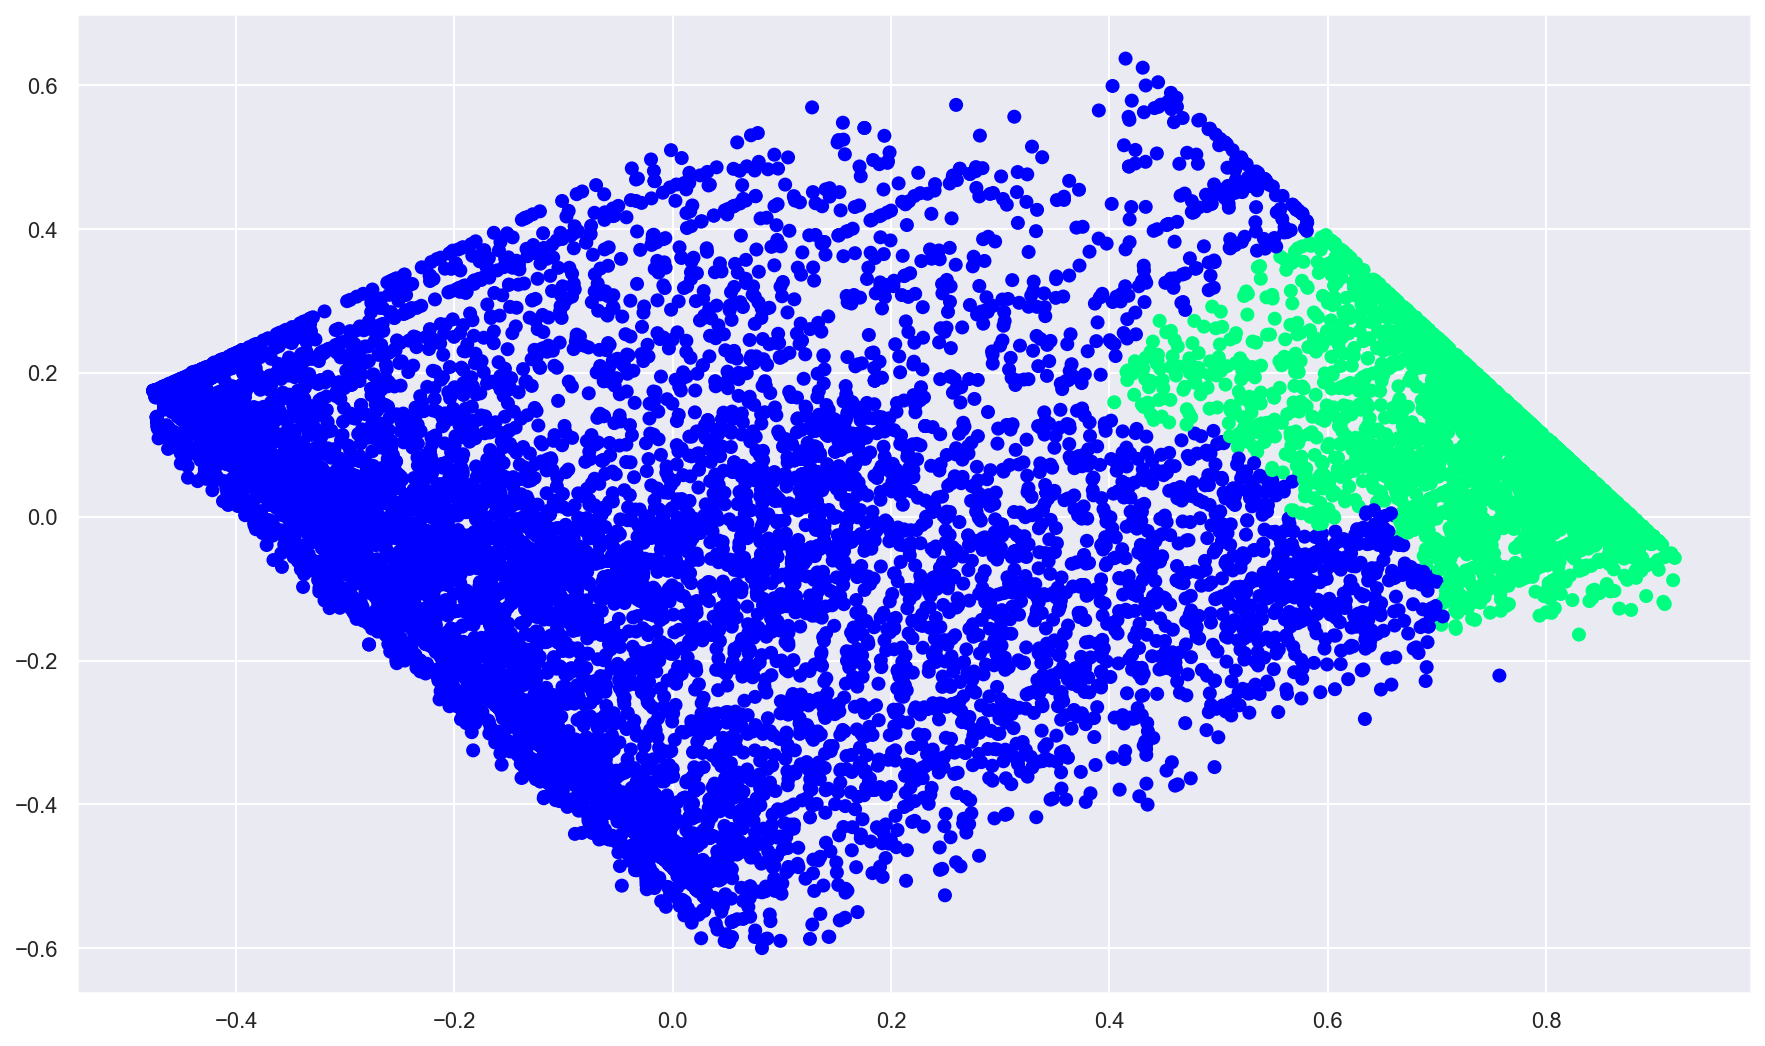

In [48]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_principal)

sns.set(font_scale=1)
plt.scatter(
    X_principal["P1"],
    X_principal["P2"],
    c=AgglomerativeClustering(n_clusters=2).fit_predict(X_principal),
    cmap=plt.cm.winter,
)
plt.show()

### Elbow and silhouette scores - no PCA

Text(0, 0.5, 'Total within-cluster sum of squares')

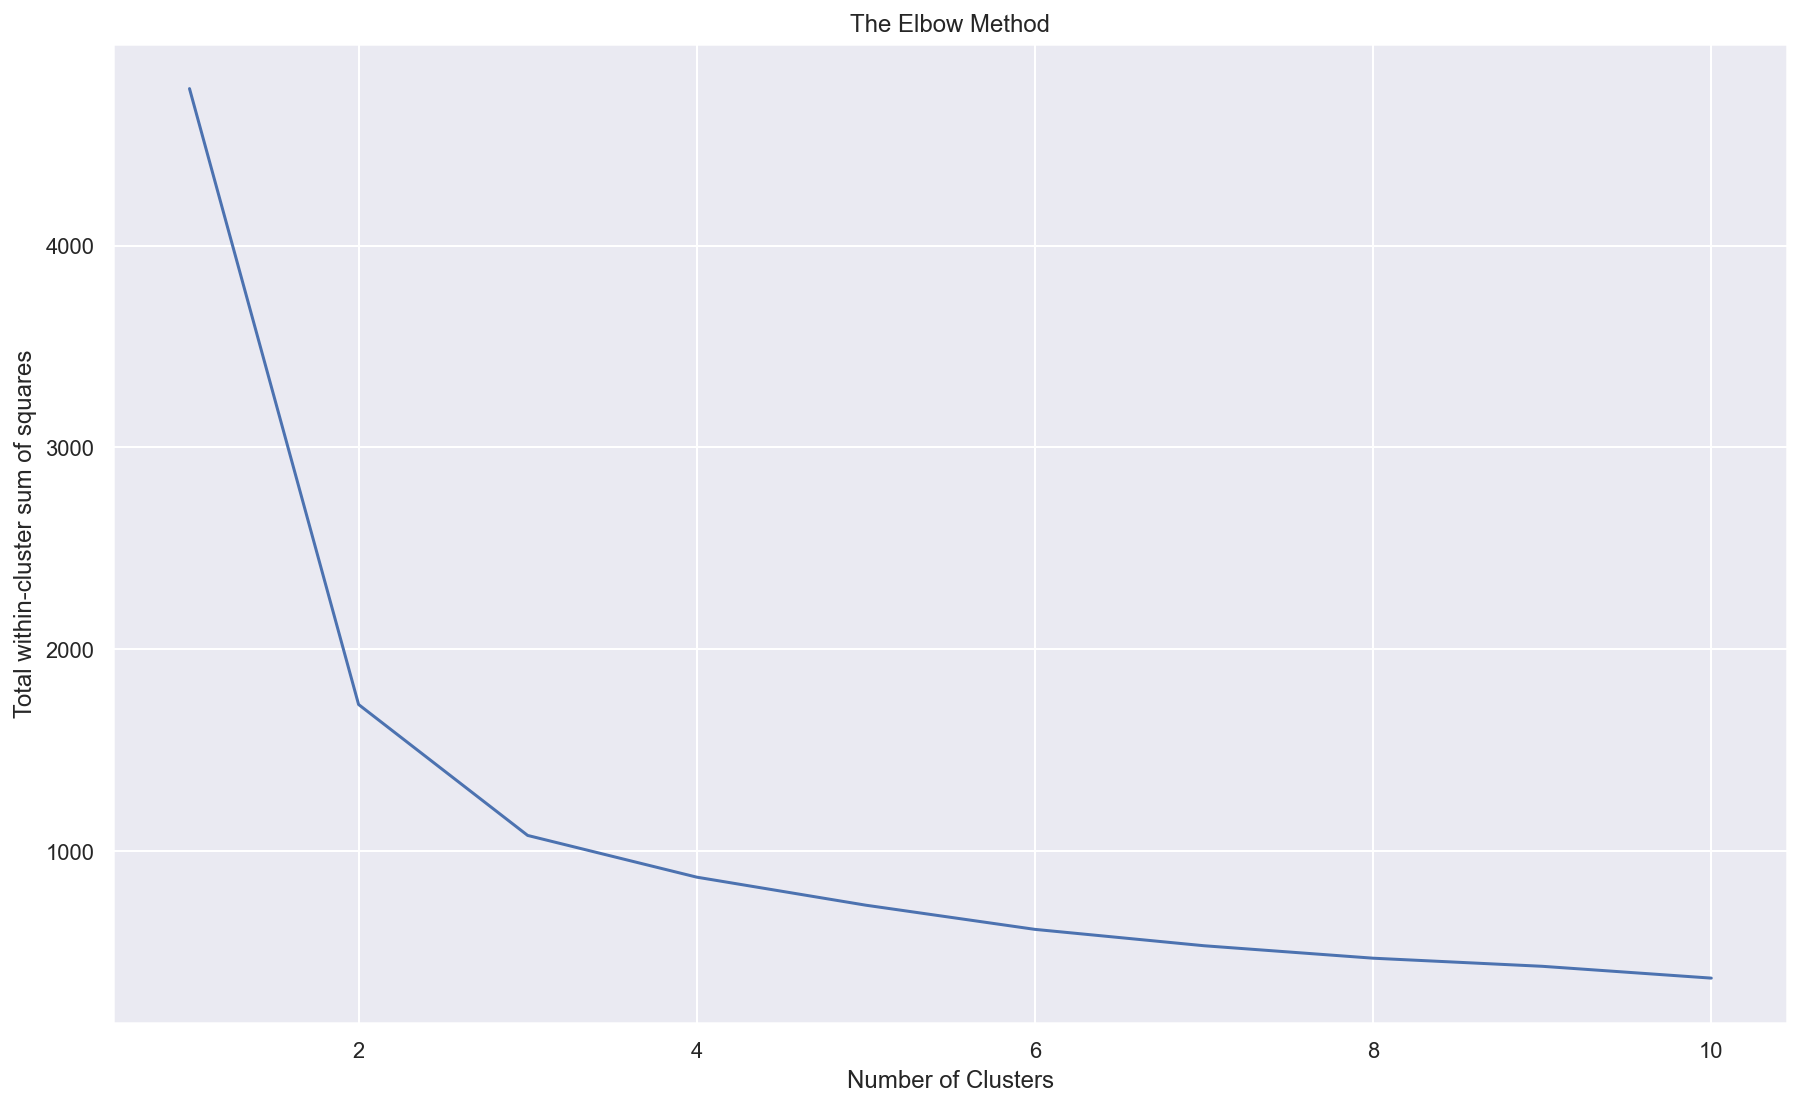

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

twss = []
sa = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X2)
    Ypreds = kmeans.predict(X2)
    twss.append(kmeans.inertia_)
    if i > 1:
        sa.append(silhouette_score(X2, Ypreds))


plt.plot(range(1, 11), twss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Total within-cluster sum of squares")

Text(0, 0.5, 'Average silhouette score')

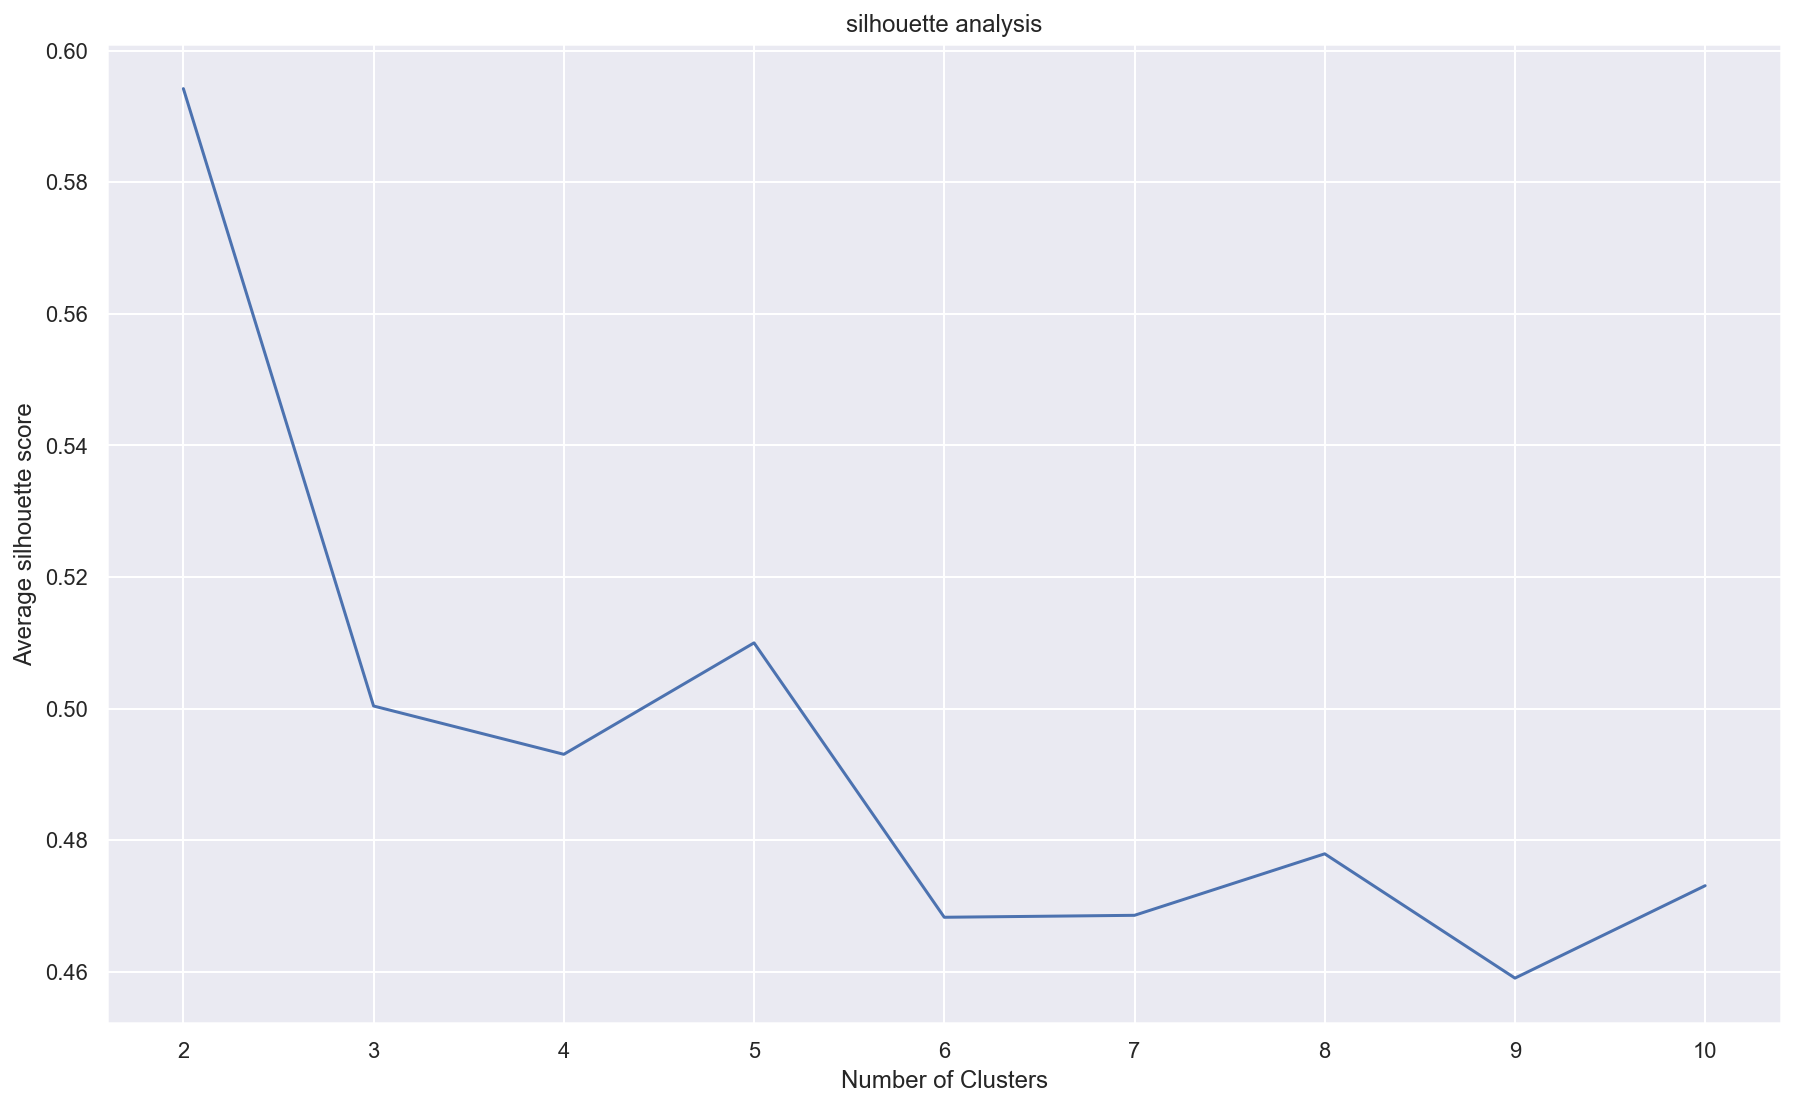

In [47]:
plt.plot(range(2, 11), sa)
plt.title("silhouette analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Average silhouette score")